In [2]:
# | echo: false

# 切换为矢量图
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

plt.rcParams['font.sans-serif'] = ['Source Han Serif']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='Source Han Serif')


In [3]:
import numpy as np
import pandas as pd
import math
import seaborn as sns


df = pd.read_excel("实验五资料/农村居民人均可支配收入来源2016.xlsx")
df


,地区,工资性收入,经营净收入,财产净收入,转移净收入
0,北京,16637.5,2061.9,1350.1,2260.0
1,天津,12048.1,5309.4,893.7,1824.4
2,河北,6263.2,3970.0,257.5,1428.6
3,山西,5204.4,2729.9,149.0,1999.1
4,内蒙古,2448.9,6215.7,452.6,2491.7
5,辽宁,5071.2,5635.5,257.6,1916.4
6,吉林,2363.1,7558.9,231.8,1969.1
7,黑龙江,2430.5,6425.9,572.7,2402.6
8,上海,18947.9,1387.9,859.6,4325.0
9,江苏,8731.7,5283.1,606.0,2984.8


In [4]:
from sklearn.preprocessing import StandardScaler
coord_cols = df.columns[1:]
# coord = df[coord_cols]
scaler = StandardScaler()
standard_coord = scaler.fit_transform(df[coord_cols])
# scaler.inverse_transform
standard_coord


array([[ 2.62267702, -1.90653048,  3.65623472, -0.05290328],
       [ 1.52887926,  0.51994204,  2.00731096, -0.75273157],
       [ 0.15015642, -0.48083311, -0.29121072, -1.38861779],
       [-0.10218878, -1.40741312, -0.68320947, -0.47206122],
       [-0.75891073,  1.1971128 ,  0.41366444,  0.31934239],
       [-0.13393451,  0.76359799, -0.29084943, -0.60492578],
       [-0.77935956,  2.20072724, -0.38406204, -0.52025876],
       [-0.76329603,  1.35417039,  0.84757273,  0.1761957 ],
       [ 3.17331769, -2.41013094,  1.88411135,  3.26469409],
       [ 0.73847728,  0.50029116,  0.96788202,  1.1115493 ],
       [ 2.04276925,  0.75343632,  1.16948138,  0.13683437],
       [-0.31978527, -0.01302265, -0.54700345,  0.56755973],
       [ 0.27456537,  0.90257378, -0.29771393, -0.25067385],
       [-0.16170011,  0.05885622, -0.48305527, -0.01048944],
       [-0.01526935,  1.23514435,  0.07441391, -0.8566776 ],
       [-0.33489548,  0.0221696 , -0.61456453,  0.58587479],
       [-0.3837534 ,  0.

In [5]:
standard_cov = np.cov(standard_coord.T)
standard_cov_inv = np.linalg.inv(standard_cov)


def mahalanobis_distance(x, y, cov_inv):
    return math.sqrt(np.dot(np.dot((x - y), cov_inv), (x - y).T))


mahalanobis_distance(standard_coord[0], standard_coord[1], standard_cov_inv)


3.010336056038395

In [6]:
np.linalg.norm(standard_coord[0]-standard_coord[1])


3.2082505564488613

In [7]:
def k_means(coord, class_count):
    centers = np.random.normal(0, 1, (class_count, coord.shape[1]))

    length = coord.shape[0]
    classification = np.zeros(length, dtype=int)

    while (True):
        old_classification = classification.copy()

        for i in range(length):
            dist_to_classes = np.linalg.norm(centers - coord[i], axis=1)
            classification[i] = np.argmin(dist_to_classes)

        for c in range(class_count):
            centers[c] = np.mean(coord[classification == c], axis=0)

        print(classification)

        if not np.any(classification != old_classification):
            return classification, centers


result, standard_centers = k_means(standard_coord, 5)
centers = scaler.inverse_transform(standard_centers)
df["分类"] = result
centers


[4 4 2 3 1 2 2 1 4 4 4 1 2 2 2 1 1 1 1 1 2 1 1 2 2 2 0 2 3 2 2]
[4 4 2 0 1 2 2 1 4 1 4 1 2 1 2 1 1 1 1 1 2 1 1 0 2 2 0 0 3 2 2]
[4 4 2 0 1 2 2 1 4 1 4 1 2 1 2 1 1 1 1 1 2 1 1 0 2 2 0 0 3 0 2]
[4 4 0 0 1 2 2 1 4 1 4 1 2 1 2 1 1 1 1 1 2 1 1 0 2 2 0 0 3 0 2]
[4 4 0 0 1 2 2 1 4 1 4 1 2 1 2 1 1 1 1 1 2 1 1 0 2 2 0 0 3 0 2]


array([[ 4104.28333333,  3345.41666667,   175.46666667,  1840.98333333],
       [ 4488.41666667,  4903.91666667,   297.61666667,  2716.725     ],
       [ 3979.925     ,  5815.225     ,   220.825     ,  1746.1125    ],
       [ 2464.3       ,  3197.        ,   325.2       ,  2677.8       ],
       [15459.45      ,  3595.275     ,   941.3       ,  2696.875     ]])

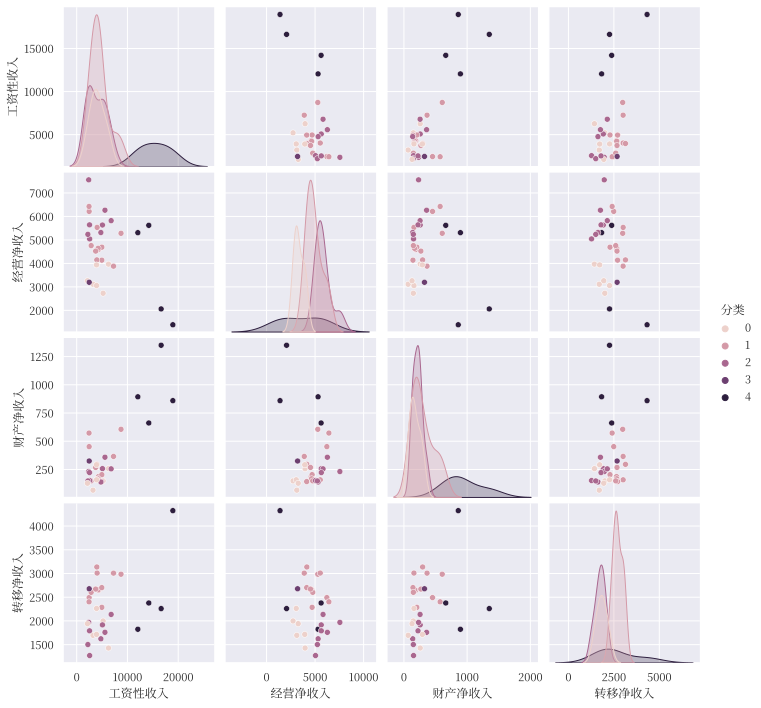

In [8]:
sns.pairplot(df.drop(['地区'], axis=1), hue="分类")


In [9]:
df.sort_values("分类")

,地区,工资性收入,经营净收入,财产净收入,转移净收入,分类
27,甘肃,2125.0,3261.4,128.4,1942.0,0
2,河北,6263.2,3970.0,257.5,1428.6,0
3,山西,5204.4,2729.9,149.0,1999.1,0
26,陕西,3916.0,3057.9,159.0,2263.6,0
29,宁夏,3906.1,3937.5,291.8,1716.3,0
23,贵州,3211.0,3115.8,67.1,1696.3,0
15,河南,4228.0,4643.2,168.0,2657.6,1
17,湖南,4946.2,4138.6,143.1,2702.5,1
16,湖北,4023.0,5534.0,158.6,3009.3,1
21,重庆,3965.6,4150.1,295.8,3137.3,1


In [10]:
df_with_center = df.copy(deep=True)
for c in range(5):
    df_with_center.loc[len(df_with_center.index)] = [
        f"第{c}类中心", *centers[c], c+5]
df_with_center


,地区,工资性收入,经营净收入,财产净收入,转移净收入,分类
0,北京,16637.500000,2061.900000,1350.100000,2260.000000,4
1,天津,12048.100000,5309.400000,893.700000,1824.400000,4
2,河北,6263.200000,3970.000000,257.500000,1428.600000,0
3,山西,5204.400000,2729.900000,149.000000,1999.100000,0
4,内蒙古,2448.900000,6215.700000,452.600000,2491.700000,1
5,辽宁,5071.200000,5635.500000,257.600000,1916.400000,2
6,吉林,2363.100000,7558.900000,231.800000,1969.100000,2
7,黑龙江,2430.500000,6425.900000,572.700000,2402.600000,1
8,上海,18947.900000,1387.900000,859.600000,4325.000000,4
9,江苏,8731.700000,5283.100000,606.000000,2984.800000,1


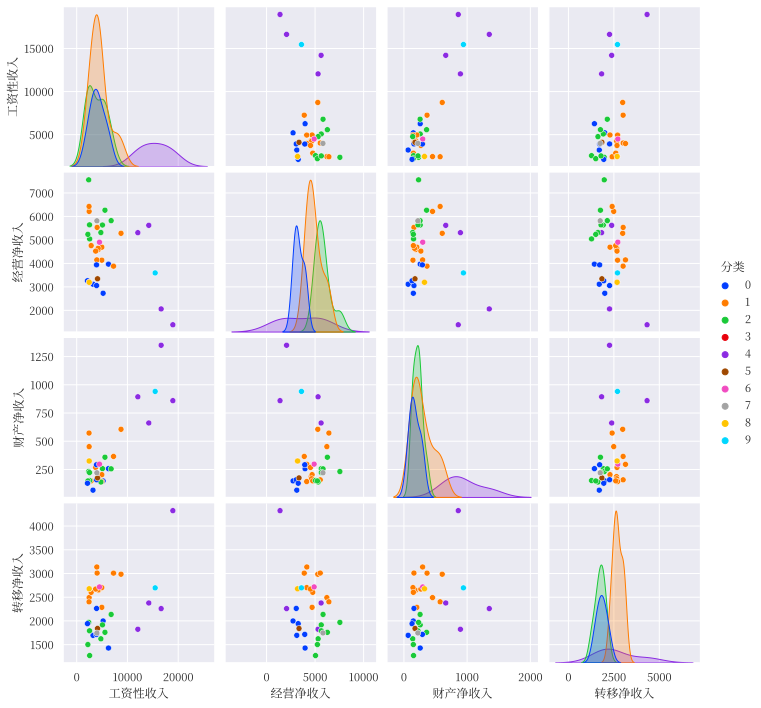

In [11]:
# sns.set_palette(sns.color_palette("bright"))
sns.pairplot(df_with_center.drop(['地区'], axis=1),
             hue="分类", palette=sns.color_palette("bright"))


In [20]:
# class_count_target = 8

# coord = standard_coord
def merge_clustering(coord, class_count_target):
    length = coord.shape[0]
    classification = np.indices((length,)).flatten()

    while True:
        alive_classes = np.unique(classification)
        class_count = len(alive_classes)
        print(alive_classes)
        if class_count == class_count_target:
            # print(classification)
            # break
            return classification

        meanses = np.zeros((class_count, coord.shape[1]))
        for c in range(class_count):
            meanses[c] = np.mean(coord[classification == alive_classes[c]], axis=0)
        # print(meanses)

        dist_mat = np.full((class_count, class_count), np.inf)
        for i in range(class_count):
            for j in range(i):
                dist_mat[i, j] = np.linalg.norm(meanses[i]-meanses[j])
        # print(dist_mat)

        a, b = np.unravel_index(np.argmin(dist_mat), dist_mat.shape)
        print("a&b", a, b)
        class_a = alive_classes[a]
        class_b = alive_classes[b]
        print(class_a, "merge to", class_b)
        classification[classification == class_a] = class_b

classification = merge_clustering(standard_coord, 8)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
a&b 15 11
15 merge to 11
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
a&b 21 11
22 merge to 11
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25
 26 27 28 29 30]
a&b 18 11
19 merge to 11
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 20 21 23 24 25 26
 27 28 29 30]
a&b 22 21
25 merge to 24
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 20 21 23 24 26 27
 28 29 30]
a&b 7 4
7 merge to 4
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 17 18 20 21 23 24 26 27 28
 29 30]
a&b 15 10
17 merge to 11
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 18 20 21 23 24 26 27 28 29
 30]
a&b 21 18
27 merge to 23
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 18 20 21 23 24 26 28 29 30]
a&b 11 5
12 merge to 5
[ 0  1  2  3  4  5  6  8  9 10 11 13 14 16 18 20 21 23 24 26 28 29 30]
a&b 19 3
26 merge to 3
[ 0  1  2  3  4  5  6  8  9 1

In [21]:
df["分类"] = classification
df.sort_values("分类")

,地区,工资性收入,经营净收入,财产净收入,转移净收入,分类
0,北京,16637.5,2061.9,1350.1,2260.0,0
1,天津,12048.1,5309.4,893.7,1824.4,1
10,浙江,14204.3,5621.9,661.8,2378.1,1
2,河北,6263.2,3970.0,257.5,1428.6,2
3,山西,5204.4,2729.9,149.0,1999.1,2
27,甘肃,2125.0,3261.4,128.4,1942.0,2
26,陕西,3916.0,3057.9,159.0,2263.6,2
23,贵州,3211.0,3115.8,67.1,1696.3,2
29,宁夏,3906.1,3937.5,291.8,1716.3,2
4,内蒙古,2448.9,6215.7,452.6,2491.7,4


<Axes: xlabel='0', ylabel='1'>

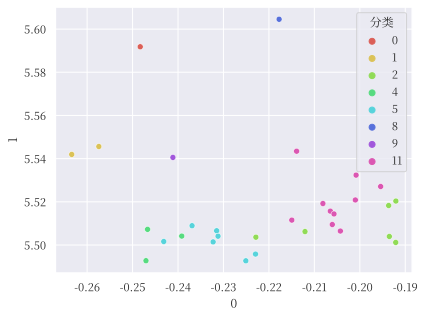

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit_transform(standard_coord)
tsne_df = pd.DataFrame(tsne.embedding_, index=df.index)
tsne_df["分类"] = classification
sns.scatterplot(tsne_df, x=0,y=1, hue="分类", palette=sns.color_palette("hls", 8))